In [132]:
import pandas as pd
import set_lib_paths
import numpy as np
import seaborn as sns
import copy
sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.options.display.max_rows = 15
pd.options.display.max_columns = 40
case_study_codes = ['303', '004']
merged_file = 'F:/Projects/Ferring/data/pre_modelling/merged_data/MERGED_COUNT_DATE.csv'
df = pd.read_csv(merged_file)
#Remove patients that did not complete study...
df = df[df['COMPLETED'] & ~df['COMPLETED'].isnull()]
df['GESTATIONAL_AGE_WEEKS'] = df['GESTATIONAL_AGE_DAYS']/7
print (len(df))

1111


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (9,2571) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
list(df.filter(regex='^[^MHTERM]').keys())
df.groupby(['STUDY_CODE', 'AGE']).size().unstack(0)



,Unnamed: 0,ACTIVE LABOR,AGE,BMI,BS_12,BS_18,BS_24,BS_6,BS_BASELINE,COMPLETED,COUNTRY,COUNTRY_dummy_CAN,COUNTRY_dummy_USA,DD_DELIVERY_METHOD,DD_DELIVERY_TIME,DELIVERY,EX_END_TIME,EX_START_TIME,GESTATIONAL_AGE_DAYS,HEIGHT,...,RACE_RAW,RACE_dummy_ASIAN,RACE_dummy_BLACK,RACE_dummy_BLACK_OR_AFRICAN_AMERICAN,RACE_dummy_HISPANIC,RACE_dummy_OTHER,RACE_dummy_WHITE,STUDY_CODE,SUBJID,USUBJID,Unnamed: 0.1,Unnamed: 0_x,Unnamed: 0_x.1,Unnamed: 0_x.2,Unnamed: 0_x.3,Unnamed: 0_y,Unnamed: 0_y.1,Unnamed: 0_y.2,Unnamed: 0_y.3,WEIGHT
680,680,2006-11-21T23:00:00,29.0,40.404040,NaN,NaN,NaN,5.0,4.0,True,CAN,1.0,0.0,SPONTANEOUS VAGINAL,2006-11-22T09:07:00,2006-11-22T09:07:00,2006-11-21T23:18:00,2006-11-21T09:30:00,284.0,165.0,...,WHITE,0.0,0.0,NaN,0.0,0.0,1.0,4,1010002.0,004-01-1010002,0.0,0.0,0.0,0,0.0,3.0,0.0,0.0,0.0,110.0
681,681,2006-12-01T19:10:00,33.0,36.132335,NaN,NaN,NaN,2.0,2.0,True,CAN,1.0,0.0,CESAREAN SECTION,2006-12-02T18:37:00,2006-12-02T18:37:00,2006-11-29T10:10:00,2006-11-28T10:00:00,288.0,163.0,...,WHITE,0.0,0.0,NaN,0.0,0.0,1.0,4,1010004.0,004-01-1010004,1.0,1.0,1.0,1,1.0,7.0,1.0,NaN,1.0,96.0
682,682,2007-01-08T17:00:00,36.0,30.795848,NaN,NaN,NaN,NaN,3.0,True,CAN,1.0,0.0,SPONTANEOUS VAGINAL,2007-01-08T21:39:00,2007-01-08T21:39:00,2007-01-08T19:56:00,2007-01-08T10:15:00,288.0,170.0,...,WHITE,0.0,0.0,NaN,0.0,0.0,1.0,4,1010008.0,004-01-1010008,2.0,2.0,2.0,2,2.0,11.0,2.0,NaN,2.0,89.0
683,683,2007-01-19T21:00:00,19.0,27.774271,NaN,NaN,NaN,5.0,2.0,True,CAN,1.0,0.0,SPONTANEOUS VAGINAL,2007-01-20T01:33:00,2007-01-20T01:33:00,2007-01-19T15:25:00,2007-01-18T15:20:00,287.0,178.0,...,WHITE,0.0,0.0,NaN,0.0,0.0,1.0,4,1010010.0,004-01-1010010,3.0,3.0,3.0,3,3.0,15.0,3.0,1.0,3.0,88.0
684,684,2007-01-21T13:57:00,31.0,24.092971,NaN,NaN,NaN,4.0,4.0,True,CAN,1.0,0.0,SPONTANEOUS VAGINAL,2007-01-21T16:46:00,2007-01-21T16:46:00,2007-01-21T11:30:00,2007-01-20T11:00:00,295.0,168.0,...,WHITE,0.0,0.0,NaN,0.0,0.0,1.0,4,2010026.0,004-01-2010026,4.0,4.0,4.0,4,4.0,19.0,4.0,NaN,4.0,68.0
685,685,2007-04-05T02:45:00,26.0,46.693878,NaN,NaN,NaN,4.0,2.0,True,CAN,1.0,0.0,SPONTANEOUS VAGINAL,2007-04-05T09:34:00,2007-04-05T09:34:00,2007-04-05T03:00:00,2007-04-04T09:40:00,292.0,175.0,...,WHITE,0.0,0.0,NaN,0.0,0.0,1.0,4,2010028.0,004-01-2010028,5.0,5.0,5.0,5,5.0,23.0,5.0,2.0,5.0,143.0
686,686,2006-10-24T22:00:00,22.0,25.155896,NaN,NaN,NaN,10.0,4.0,True,CAN,1.0,0.0,SPONTANEOUS VAGINAL,2006-10-25T04:58:00,2006-10-25T04:58:00,2006-10-24T22:00:00,2006-10-24T11:15:00,290.0,168.0,...,WHITE,0.0,0.0,NaN,0.0,0.0,1.0,4,1020045.0,004-02-1020045,6.0,6.0,6.0,6,6.0,27.0,6.0,3.0,6.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1107,2007-06-08T07:49:00,21.0,27.887617,NaN,NaN,NaN,NaN,0.0,True,USA,0.0,1.0,SPONTANEOUS VAGINAL,2007-06-08T10:23:00,2007-06-08T10:23:00,2007-06-08T07:49:00,2007-06-07T23:30:00,285.0,155.0,...,OTHER,0.0,0.0,NaN,0.0,1.0,0.0,4,1562317.0,004-60-1562317,427.0,427.0,428.0,429,427.0,1705.0,427.0,388.0,428.0,67.0
1108,1108,2007-06-27T19:05:00,23.0,47.610803,NaN,NaN,NaN,3.0,4.0,True,USA,0.0,1.0,CESAREAN SECTION,2007-06-28T00:03:00,2007-06-28T00:03:00,2007-06-26T23:12:00,2007-06-25T23:48:00,286.0,152.0,...,OTHER,0.0,0.0,NaN,0.0,1.0,0.0,4,1562321.0,004-60-1562321,428.0,428.0,429.0,430,428.0,1709.0,428.0,389.0,429.0,110.0


In [133]:
grouped_df = df.groupby('STUDY_CODE')

In [104]:
df.groupby(['STUDY_CODE', col]).size().apply(lambda x:100*(x/1114))

STUDY_CODE  RACE    
4           ASIAN        1.077199
            BLACK/AA     7.540395
            HISPANIC    11.131059
            OTHER        1.526032
            WHITE       17.414722
303         ASIAN        1.256732
            BLACK/AA    19.030521
            HISPANIC    12.387792
            OTHER        1.705566
            WHITE       26.660682
dtype: float64

In [137]:
df['AGE'].mean()

25.915391539153916

In [96]:
print(df[df['COMPLETED'].isnull()]['USUBJID'])
print(df[df['DD_DELIVERY_TIME'].isnull()]['USUBJID'])

724     004-06-1060223
729     004-06-2060240
731     004-06-2060246
1114    004-06-1060227
1115    004-32-2321339
Name: USUBJID, dtype: object
729     004-06-2060240
731     004-06-2060246
1114    004-06-1060227
1115    004-32-2321339
Name: USUBJID, dtype: object


[(0.29803921568627451, 0.44705882352941179, 0.69019607843137254),
 (0.33333333333333331, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.30588235294117649, 0.32156862745098042),
 (0.50588235294117645, 0.44705882352941179, 0.69803921568627447),
 (0.80000000000000004, 0.72549019607843135, 0.45490196078431372),
 (0.39215686274509803, 0.70980392156862748, 0.80392156862745101)]

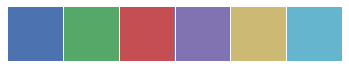

In [32]:
current_palette = sns.color_palette()
sns.palplot(current_palette)
current_palette

# Produce plots

['MISO-OBS-004', 'MISO-OBS-303']


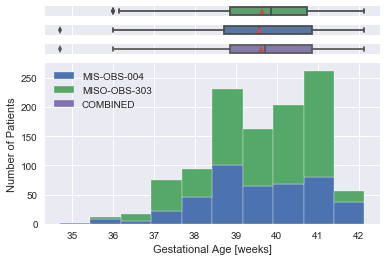

In [135]:
#Standard distribution plots
plot_cols = {'AGE':'Patient Age', 'BS_BASELINE': 'Baseline Modified Bishop Score', 'OXYTOCIN_DOSAGE': 'Pre-delivery Oxytocin Dosage [Units]', 'BMI':'BMI', 'HEIGHT':'Height [m]', 'WEIGHT': 'Weight [kg]', 'GESTATIONAL_AGE_DAYS': 'Gestational Age [days]', 'RACE': 'Ethnicity', 'GESTATIONAL_AGE_WEEKS': 'Gestational Age [weeks]'}
n_patients = len(df)
plt.clf()
#sns.distplot(df['GESTATIONAL_AGE_DAYS'][df['STUDY_CODE'] == 303].dropna(), kde=False)
bs_cols = list(df.filter(regex='^BS_').keys())
#
#for col in bs_cols:
#    sns.distplot(df[col].dropna(), label=col.split('_')[1], kde=False, bins=range(12), hist_kws={"alpha":0.4})
for col,x_title in plot_cols.items():
    plt.clf()
    if col != 'RACE':        f, (ax_box1, ax_box2, ax_box3, ax_hist) = plt.subplots(4, sharex=True, 
                                    gridspec_kw={"height_ratios": (.05, .05, .05, .85)})
    #else: 
    #    f, (ax_hist) = plt.subplots(1, sharex=True, gridspec_kw={"height_ratios": (1)})
    
    if col in ['BS_BASELINE', 'RACE']: 
        #ax = sns.distplot(df[col].dropna(), kde=False, bins=range(12), hist_kws={"alpha":0.4})
        #[df[col].dropna()]
        if col == 'BS_BASELINE':
            #df.groupby(['STUDY_CODE', col]).size().apply(lambda x:100*(x/n_patients)).unstack(0).plot.bar(stacked=True, edgecolor='white', ax=ax_hist)
            df.groupby(['STUDY_CODE', col]).size().unstack(0).plot.bar(stacked=True, edgecolor='white', ax=ax_hist)
        else:
            df.loc[df['RACE']=='BLACK_OR_AFRICAN_AMERICAN', 'RACE'] = 'BLACK/AA'
            ax = df.groupby(['STUDY_CODE', col]).size().apply(lambda x:100*(x/n_patients)).unstack(0).plot.bar(stacked=True, edgecolor='white', rot=0)
    else: #ax = sns.distplot(df[col].dropna(), kde=False, hist_kws={"alpha":0.4})
        #ax = df.groupby(['STUDY_CODE', col]).size().unstack(0).plot.hist(stacked=True, edgecolor='white')
        #df[col].plot.hist(edgecolor='white')
        df_c = pd.DataFrame({'MIS-OBS-004': grouped_df.get_group(4)[col], 'MISO-OBS-303':   grouped_df.get_group(303)[col]})
        plot = df_c.plot.hist(stacked=True, edgecolor='white', ax=ax_hist)
    #ax.text(0.3, 1.3,'Patients with missing information: %.2f%%'%((n_missing*100)/len(df)))

    if col == 'RACE':
        plt.xlabel(x_title)
        plt.ylabel('Number of Patients')
        
        handles, labels = ax.get_legend_handles_labels()
        
        labels[0] = 'MISO-OBS-004'
        labels[1] = 'MISO-OBS-303'
        print(labels)
        plt.legend(handles, labels)
        plt.savefig('F:/Projects/Ferring/results/pre_modelling/sprint_1_2_plots/' + col.lower() + '.svg', format='svg', dpi=1200)
        continue
    #ax2 = ax.twinx()
    sns.boxplot(x=df[df['STUDY_CODE']==4][col].dropna(), ax=ax_box2, showmeans=True, color=current_palette[0])
    sns.boxplot(x=df[df['STUDY_CODE']==303][col].dropna(), ax=ax_box1, showmeans=True, color=current_palette[1])
    bx = sns.boxplot(x=df[col].dropna(), ax=ax_box3, showmeans=True, color=current_palette[3])
    
    ax_box3.set(yticks=[])
    ax_box1.set(yticks=[])
    ax_box2.set(yticks=[])
    
    
    handles, labels = ax_hist.get_legend_handles_labels()
    plt.ylabel('Number of Patients')
    if handles:
        handles.append(copy.copy(handles[-1]))
        try: handles[-1].set_facecolor(current_palette[3])
        except: 
            handles[-1] = copy.copy(prev_handles[-1])
            handles[-1].set_facecolor(current_palette[3])
        if 'BS' in col: 
            labels[0] = 'MISO-OBS-004'
            labels[1] = 'MISO-OBS-303'
            #plt.ylabel('Number of Patients')
            #for item in handles[-1].get_children(): 
            #    item.set_facecolor(current_palette[3])
    
        labels.append('COMBINED')
        plt.legend(handles, labels)
        
    prev_handles = handles
    #ax2.set(ylim=(-10,5))
    #n_missing = df[col].isnull().sum()
    
    plt.xlabel(x_title)
    
    plt.savefig('F:/Projects/Ferring/results/pre_modelling/sprint_1_2_plots/' + col.lower() + '.svg', format='svg', dpi=1200)
#sns.violinplot(x='')
#plt.legend()
#plt.show()


#df['BS_BASELINE'].plot(kind='hist')


In [128]:
df.groupby(['DD_DELIVERY_METHOD', 'OXYTOCIN_ADMINISTERED']).size().unstack(0).transpose()*100/n_patients

OXYTOCIN_ADMINISTERED,False,True
DD_DELIVERY_METHOD,,
CESAREAN SECTION,5.490549,22.322232
INSTRUMENTED VAGINAL,1.170117,5.940594
SPONTANEOUS VAGINAL,21.242124,43.834383


In [129]:
df.groupby(['DD_DELIVERY_METHOD', 'OXYTOCIN_ADMINISTERED']).size().unstack(0).transpose()

OXYTOCIN_ADMINISTERED,False,True
DD_DELIVERY_METHOD,,
CESAREAN SECTION,61,248
INSTRUMENTED VAGINAL,13,66
SPONTANEOUS VAGINAL,236,487


In [ ]:
tips

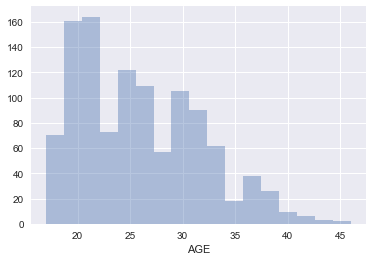

In [44]:
sns.distplot(df['AGE'].dropna(), kde=False)
